In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [17]:
data = pd.read_json('./data/Sarcasm_Headlines_Dataset.json', lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [23]:
def extract_website_name(link):
    link = link.replace('https://','')
    link = link.replace('www.','')
    link = link.split('.com')[0]

    return link

In [28]:
articles = data[['article_link', 'is_sarcastic']]
articles.loc[:,'article_link'] = articles['article_link'].apply(extract_website_name)
articles.head()

,article_link,is_sarcastic
0,huffingtonpost,0
1,huffingtonpost,0
2,local.theonion,1
3,politics.theonion,1
4,huffingtonpost,0


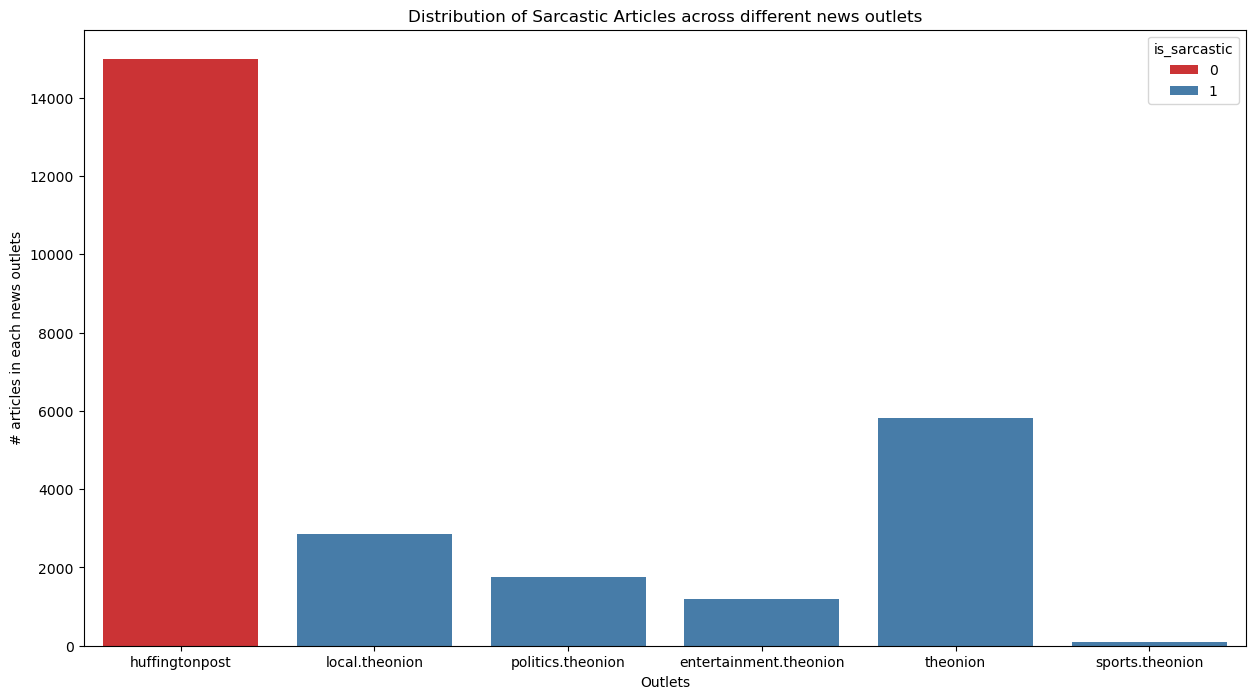

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(articles, x='article_link', hue='is_sarcastic', palette='Set1')
plt.ylabel('# articles in each news outlets')
plt.xlabel('Outlets')
plt.title('Distribution of Sarcastic Articles across different news outlets')
plt.show()

In [40]:
articles['article_link'].value_counts() / articles.shape[0] * 100

article_link
huffingtonpost            56.104684
theonion                  21.756711
local.theonion            10.678049
politics.theonion          6.615748
entertainment.theonion     4.470403
sports.theonion            0.374406
Name: count, dtype: float64

1. In the dataset, more than 50% of the news headlines belong to ```huffingtonpost```
2. ```huffingtonpost``` don't post any sarcastic headlines while headlines by different divisions of ```theonion``` always have sarcastic headlines

In [44]:
articles['headline_length'] = data['headline'].apply(lambda x: len(x))
articles.head()

,article_link,is_sarcastic,headline_length
0,huffingtonpost,0,78
1,huffingtonpost,0,84
2,local.theonion,1,79
3,politics.theonion,1,84
4,huffingtonpost,0,64


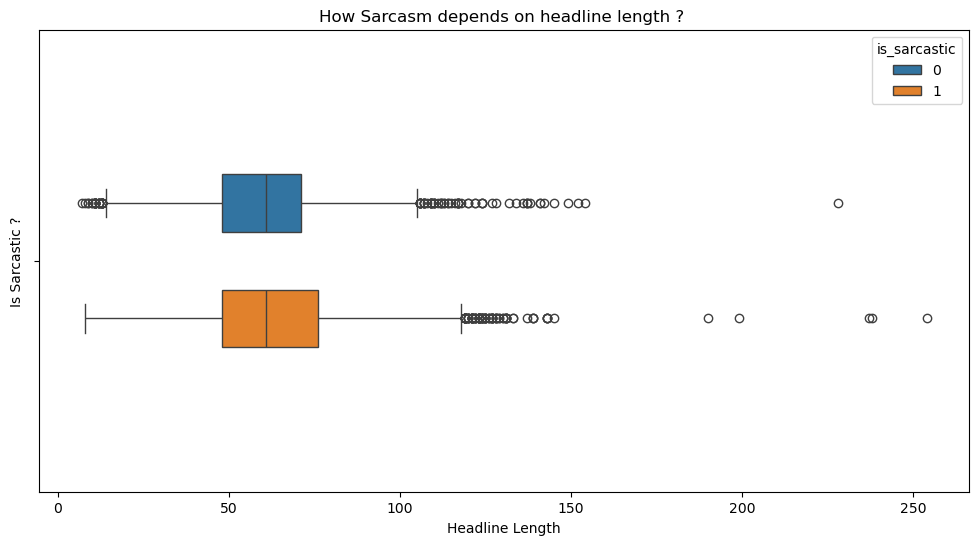

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(articles, x='headline_length', hue='is_sarcastic', width=0.5, gap=0.5)
plt.title('How Sarcasm depends on headline length ? ')
plt.ylabel('Is Sarcastic ?')
plt.xlabel('Headline Length')
plt.show()


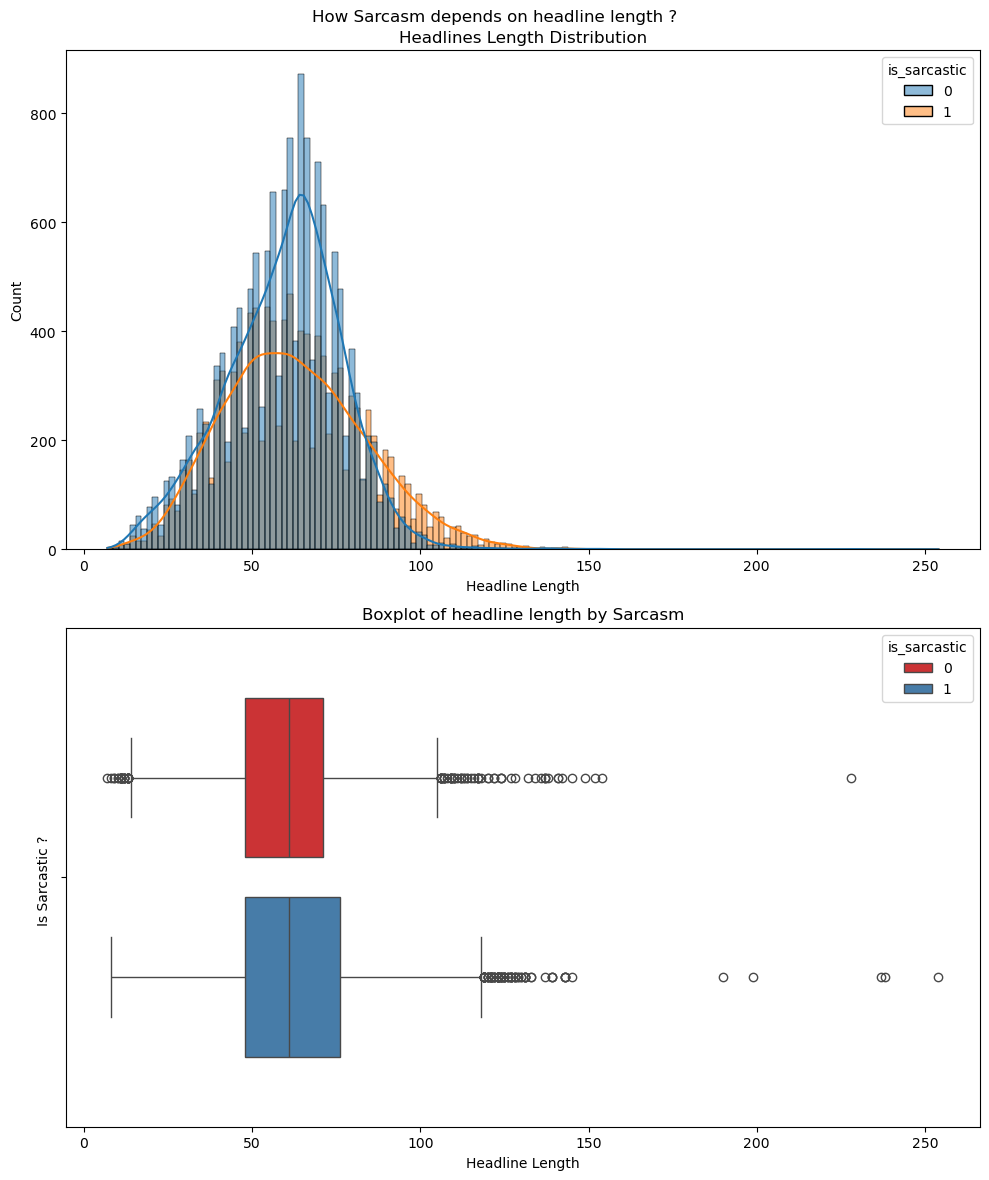

In [66]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column

sns.histplot(data=articles, x="headline_length", hue="is_sarcastic", kde=True, ax=axes[0])
axes[0].set_title("Headlines Length Distribution")
axes[0].set_xlabel("Headline Length")
axes[0].set_ylabel("Count")

sns.boxplot(data=articles, x="headline_length", hue="is_sarcastic", whis=1.5, gap=0.2, palette="Set1", ax=axes[1])
axes[1].set_title("Boxplot of headline length by Sarcasm")
axes[1].set_xlabel("Headline Length")
axes[1].set_ylabel("Is Sarcastic ? ")

plt.suptitle('How Sarcasm depends on headline length ?')
plt.tight_layout()
plt.show()

The median of headline length lies around 60 letters.<br>

Overall headline leangth of sarcastic articles are less than non sarcartic articles as evident from the histogram plot. <br>

There are some outliers in sarcastic headlines where some headlines lines have length close or more than 200 letters.


In [68]:
from wordcloud import WordCloud

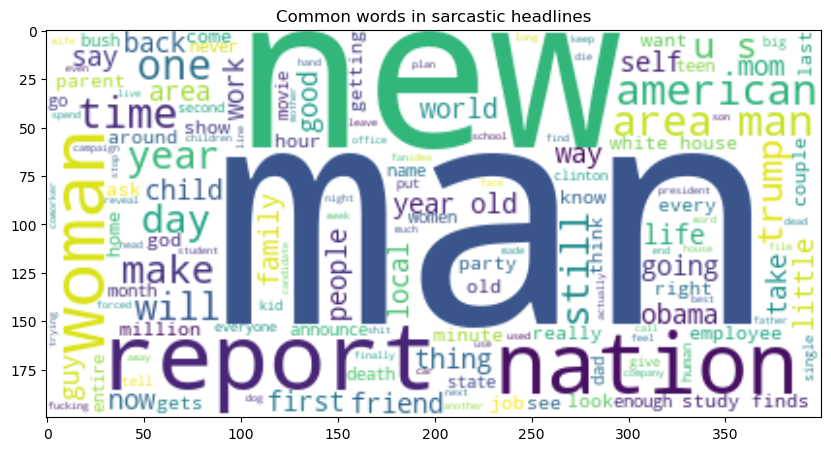

In [79]:
wc = WordCloud(background_color='white').generate(' '.join(data[data['is_sarcastic'] == 1].headline))

plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title("Common words in sarcastic headlines")
plt.show()
                                                 

In sarcastic headlines, the most common word is ```man``` and ```new```. Other common words include ```report```, ```nation```, ```woman```, etc. This gives an idea of the commonly used words used by the news outlets to show sarcasm and attract the atention of the readers.

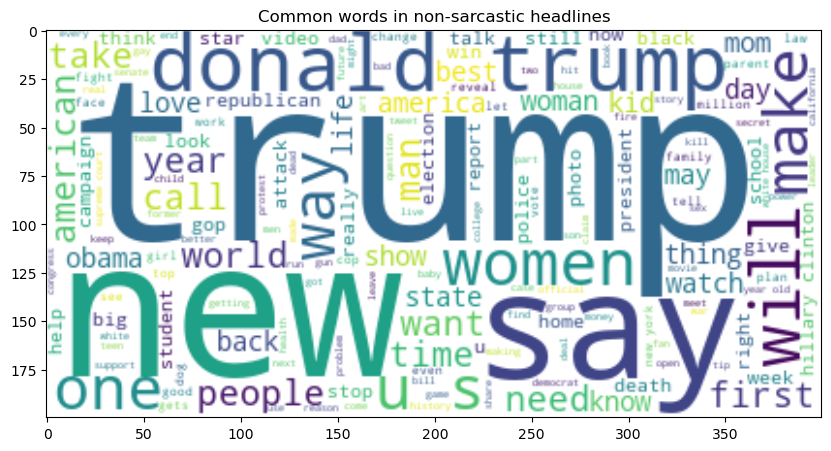

In [80]:
wc = WordCloud(background_color='white').generate(' '.join(data[data['is_sarcastic'] == 0].headline))

plt.figure(figsize=(10, 12))
plt.imshow(wc, interpolation='bilinear')
plt.title("Common words in non-sarcastic headlines")
plt.show()
                                                 

The non-sarcastic headlines include words like ```trump```, ```donald```, ```new```, ```say```. From the above picture, it is possible to infer that non-sarcastic words include more proper nouns than sarcastic words. It contains names of indiviuals, country, date, etc.